In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngg, cities, wind_speed, humidity, cloudiness

lat_lngs = []
cities = []
country=[]
lat=[]
lng=[]
city_temp=[]
cloudiness=[]
humidity=[]
wind_speed=[]
units="imperial"

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    time.sleep(2)
    #Creating a list of cities for the randomly selected latitude and longitude
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country_code =  citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    query_city = city + ','+ country_code
    
    #call the Openweathermap API and get the temperature, humidity, cloudiness and wind_speed
    if city not in cities:
        url = "http://api.openweathermap.org/data/2.5/weather?"
        units = "imperial"
        query_url = f"{url}appid={weather_api_key}&units={units}&q=" + query_city
        print(f"Retrieving Results for {query_city} Latitude and Longitutde {lat_lng}.")
        try:
            response = requests.get(query_url + query_city).json()
            city_temp_var = response["main"]["temp"]
            m_humidity = response["main"]["humidity"]
            m_cloudiness= response["clouds"]["all"]
            m_wind_speed= response["wind"]["speed"]
            
            city_temp.append(city_temp_var)
            cities.append(city)
            country.append(country_code)
            lat.append(lat_lng[0])
            lng.append(lat_lng[1])
            humidity.append(m_humidity)
            wind_speed.append(m_wind_speed)
            cloudiness.append(m_cloudiness)
        except:
            pass
            
        
# Converting Raw into DataFrame
city500_weather_df = pd.DataFrame()
city500_weather_df["city_name"]=cities
city500_weather_df["country_code"]=country
city500_weather_df["lattitude"]=lat
city500_weather_df["longitude"]=lng
city500_weather_df["temp"]=city_temp
city500_weather_df["wind_speed"] = wind_speed
city500_weather_df["cloudiness"] = cloudiness
city500_weather_df["humidity"] = humidity



Retrieving Results for bluff,nz Latitude and Longitutde (-76.039275724991, 172.58320220922474).
Retrieving Results for aykhal,ru Latitude and Longitutde (68.29343778793609, 110.5387523697728).
Retrieving Results for mataura,pf Latitude and Longitutde (-64.09056810725485, -161.01352597162577).
Retrieving Results for puerto ayora,ec Latitude and Longitutde (3.038544360742918, -89.47420624523228).
Retrieving Results for bargal,so Latitude and Longitutde (9.997222823533875, 60.051700990313265).
Retrieving Results for vaini,to Latitude and Longitutde (-35.10910759106209, -179.18346436351848).
Retrieving Results for bredasdorp,za Latitude and Longitutde (-60.711009112323204, 20.212912641309458).
Retrieving Results for rikitea,pf Latitude and Longitutde (-26.183991800040722, -138.1186006502943).
Retrieving Results for atuona,pf Latitude and Longitutde (-1.9024278399236607, -126.17639440420903).
Retrieving Results for anadyr,ru Latitude and Longitutde (66.6678249063994, 177.07586609315933).
Re

Retrieving Results for kapaa,us Latitude and Longitutde (22.986442312385577, -163.66504340380948).
Retrieving Results for alcaniz,es Latitude and Longitutde (40.85368833113148, -0.32912086759677095).
Retrieving Results for venado tuerto,ar Latitude and Longitutde (-33.94146612669266, -62.71298168890738).
Retrieving Results for zherdevka,ru Latitude and Longitutde (51.96309347286953, 41.2237849350206).
Retrieving Results for punta arenas,cl Latitude and Longitutde (-72.04051592627575, -96.87027939055217).
Retrieving Results for formoso do araguaia,br Latitude and Longitutde (-9.915993411846287, -51.551637826382375).
Retrieving Results for mahebourg,mu Latitude and Longitutde (-39.86000834427903, 76.02317250617978).
Retrieving Results for sao felix do xingu,br Latitude and Longitutde (-8.913939884108515, -52.26216858454774).
Retrieving Results for ust-kuyga,ru Latitude and Longitutde (68.9363287004293, 136.6978868245884).
Retrieving Results for kodiak,us Latitude and Longitutde (41.96667

Retrieving Results for barrow,us Latitude and Longitutde (78.55215949886323, -156.29982860171708).
Retrieving Results for tsihombe,mg Latitude and Longitutde (-33.37352014516868, 47.30249920773497).
Retrieving Results for narsaq,gl Latitude and Longitutde (75.42539412871258, -68.11184903898096).
Retrieving Results for tamazulapam,mx Latitude and Longitutde (17.663322828767818, -97.66751961064578).
Retrieving Results for dzhusaly,kz Latitude and Longitutde (47.31324489992923, 64.35909081436799).
Retrieving Results for sikonge,tz Latitude and Longitutde (-5.433619869141438, 32.60691112126307).
Retrieving Results for pisco,pe Latitude and Longitutde (-26.2180142311936, -98.03641539938229).
Retrieving Results for castro,cl Latitude and Longitutde (-50.11822387319048, -101.0516979398871).
Retrieving Results for rincon,an Latitude and Longitutde (13.34235190998929, -68.14996140251537).
Retrieving Results for ambikapur,in Latitude and Longitutde (23.513410431928165, 83.27486978502657).
Retrie

Retrieving Results for lebu,cl Latitude and Longitutde (-29.61644544923955, -99.20739278677527).
Retrieving Results for namikupa,tz Latitude and Longitutde (-11.748718658813743, 40.01700007059921).
Retrieving Results for nuuk,gl Latitude and Longitutde (65.56558755296723, -48.40178427751468).
Retrieving Results for dzhebariki-khaya,ru Latitude and Longitutde (62.87334360301409, 136.925686913959).
Retrieving Results for kyabe,td Latitude and Longitutde (10.076082435602274, 18.321588664998416).
Retrieving Results for nguiu,au Latitude and Longitutde (-9.949097097248156, 129.1398531674937).
Retrieving Results for qaqortoq,gl Latitude and Longitutde (61.371522820945785, -47.170226357884786).
Retrieving Results for jasper,ca Latitude and Longitutde (52.767779586400906, -118.09315506834926).
Retrieving Results for amderma,ru Latitude and Longitutde (71.09882021232315, 63.53220803191067).
Retrieving Results for tumannyy,ru Latitude and Longitutde (70.27499852705853, 36.1541094328648).
Retriev

Retrieving Results for vestbygda,no Latitude and Longitutde (56.33516019625719, 6.052014292529293).
Retrieving Results for arman,ru Latitude and Longitutde (56.702692752518004, 147.35078485577526).
Retrieving Results for drovyanaya,ru Latitude and Longitutde (51.065448593046966, 113.10492672220056).
Retrieving Results for alakurtti,ru Latitude and Longitutde (67.1551600573408, 29.259241874607255).
Retrieving Results for gainesville,us Latitude and Longitutde (34.26052551224956, -83.81775852812585).
Retrieving Results for ribeira grande,pt Latitude and Longitutde (29.124945120549867, -42.55937311811351).
Retrieving Results for leningradskiy,ru Latitude and Longitutde (84.36726735952715, 176.01563129905924).
Retrieving Results for maghama,mr Latitude and Longitutde (16.234264127220968, -11.51945168068454).
Retrieving Results for axim,gh Latitude and Longitutde (-1.5980737230818818, -3.4460376005300475).
Retrieving Results for esperance,au Latitude and Longitutde (-44.81999831064984, 126.

Retrieving Results for gornopravdinsk,ru Latitude and Longitutde (62.26659294084138, 70.30665120934776).
Retrieving Results for tamiahua,mx Latitude and Longitutde (22.433293039692614, -95.18119405862075).
Retrieving Results for samusu,ws Latitude and Longitutde (-0.23825479693093143, -160.21764499735738).
Retrieving Results for klaksvik,fo Latitude and Longitutde (72.27420187610605, -8.045716070616976).
Retrieving Results for kruisfontein,za Latitude and Longitutde (-86.1197534981701, 29.410138696564502).
Retrieving Results for boende,cd Latitude and Longitutde (-0.0821017314340935, 21.703595255893987).
Retrieving Results for taylorville,us Latitude and Longitutde (39.0799447566296, -89.24273746024154).
Retrieving Results for kashi,cn Latitude and Longitutde (38.925842985413254, 76.15144012371991).
Retrieving Results for chirongui,yt Latitude and Longitutde (-13.823825348480526, 45.10019588566226).
Retrieving Results for mount isa,au Latitude and Longitutde (-25.927201614161973, 140.0

Retrieving Results for vung tau,vn Latitude and Longitutde (7.863563899731389, 108.7447506411911).
Retrieving Results for elko,us Latitude and Longitutde (38.95714268852359, -116.50850348445513).
Retrieving Results for hillsborough,us Latitude and Longitutde (43.12249143759115, -72.01653846373873).
Retrieving Results for peking,cn Latitude and Longitutde (40.03953944914838, 116.272063022152).
Retrieving Results for djibo,bf Latitude and Longitutde (13.876276482068903, -1.0605464891595489).
Retrieving Results for atikokan,ca Latitude and Longitutde (48.91864919229715, -92.38032065799744).
Retrieving Results for comodoro rivadavia,ar Latitude and Longitutde (-49.42507321435805, -61.99771505741232).
Retrieving Results for inyonga,tz Latitude and Longitutde (-6.496838905469119, 31.62508871553962).
Retrieving Results for goose creek,us Latitude and Longitutde (33.528135006318124, -79.88184363789227).
Retrieving Results for petrovskoye,ru Latitude and Longitutde (56.74996450236162, 39.282032

Retrieving Results for samana,do Latitude and Longitutde (19.663627072257725, -69.39568315025367).
Retrieving Results for conversion,ph Latitude and Longitutde (15.97295693678123, 121.25847168149062).
Retrieving Results for port macquarie,au Latitude and Longitutde (-35.605741557655485, 160.03756559795414).
Retrieving Results for katha,mm Latitude and Longitutde (24.460172019445963, 95.69783123291444).
Retrieving Results for gua musang,my Latitude and Longitutde (4.78804169805224, 101.97957700159446).
Retrieving Results for khuzdar,pk Latitude and Longitutde (27.494147042873223, 66.70224849854984).
Retrieving Results for brezoi,ro Latitude and Longitutde (45.323048287537176, 24.1553357528702).
Retrieving Results for illoqqortoormiut,gl Latitude and Longitutde (86.11527016248058, -12.742765803133437).
Retrieving Results for egvekinot,ru Latitude and Longitutde (57.480152749554804, -179.62102048728462).
Retrieving Results for vanimo,pg Latitude and Longitutde (2.1601448042270732, 142.973

Retrieving Results for meyungs,pw Latitude and Longitutde (9.099119447372743, 133.6947233261269).
Retrieving Results for wilmington,us Latitude and Longitutde (30.63974144048629, -75.69988465657016).
Retrieving Results for makakilo city,us Latitude and Longitutde (7.248432506860468, -166.66013409749232).
Retrieving Results for aflu,dz Latitude and Longitutde (31.68686670266304, 0.8663803102336942).
Retrieving Results for marcona,pe Latitude and Longitutde (-23.896101025692147, -86.37497378412132).
Retrieving Results for mumford,gh Latitude and Longitutde (0.6155460356673359, 1.1416461238174236).
Retrieving Results for usinsk,ru Latitude and Longitutde (67.93448802252186, 56.81478426815619).
Retrieving Results for ada,us Latitude and Longitutde (34.70425886209841, -96.48814658282174).
Retrieving Results for panama city,us Latitude and Longitutde (26.968696011740917, -86.08937431011522).
Retrieving Results for tiarei,pf Latitude and Longitutde (-13.878725098335167, -145.20964970591652).


In [4]:
city500_weather_df.loc[city500_weather_df.duplicated(),:]
# No duplicate found 

,city_name,country_code,lattitude,longitude,temp,wind_speed,cloudiness,humidity


In [5]:
city500_weather_df.head()

,city_name,country_code,lattitude,longitude,temp,wind_speed,cloudiness,humidity
0,bluff,nz,-76.039276,172.583202,50.00,10.00,100,87
1,aykhal,ru,68.293438,110.538752,-35.50,0.89,6,76
2,mataura,pf,-64.090568,-161.013526,50.00,10.00,70,87
3,puerto ayora,ec,3.038544,-89.474206,82.83,18.41,40,70
4,vaini,to,-35.109108,-179.183464,73.40,13.80,75,94


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [38]:
city500_weather_df.to_csv("../output_data/city500_weather_data.csv", encoding="utf-8", index=False)


## Inspect the data and make dataFrame of  the cities where the humidity < 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
clean_city_data=city500_weather_df.loc[city500_weather_df.humidity < 101]
clean_city_data.reset_index()

,index,city_name,country_code,lattitude,longitude,temp,wind_speed,cloudiness,humidity
0,0,bluff,nz,-76.039276,172.583202,50.00,10.00,100,87
1,1,aykhal,ru,68.293438,110.538752,-35.50,0.89,6,76
2,2,mataura,pf,-64.090568,-161.013526,50.00,10.00,70,87
3,3,puerto ayora,ec,3.038544,-89.474206,82.83,18.41,40,70
4,4,vaini,to,-35.109108,-179.183464,73.40,13.80,75,94
...,...,...,...,...,...,...,...,...,...
560,560,harper,lr,0.747391,-10.838844,78.85,6.35,3,83
561,561,paamiut,gl,65.890458,-47.560342,26.74,6.22,100,85
562,562,thunder bay,ca,47.887301,-89.440157,3.43,11.50,20,60
563,563,solnechnyy,ru,61.712336,139.221130,-11.13,2.28,100,85


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

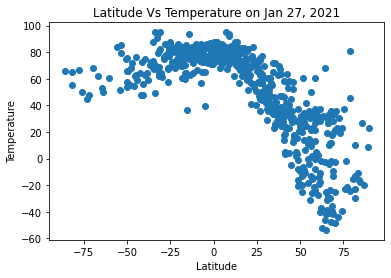

In [25]:
x_values = clean_city_data['lattitude']
y_values = clean_city_data['temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Latitude Vs Temperature on Jan 27, 2021")
plt.show()

## Latitude vs. Humidity Plot

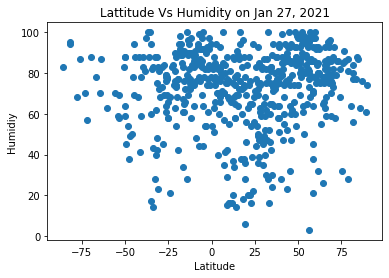

In [26]:
x_values = clean_city_data['lattitude']
y_values = clean_city_data['humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidiy')
plt.title('Lattitude Vs Humidity on Jan 27, 2021')
plt.show()

## Latitude vs. Cloudiness Plot

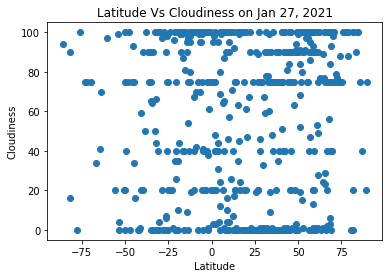

In [29]:
x_values = clean_city_data['lattitude']
y_values = clean_city_data['cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude Vs Cloudiness on Jan 27, 2021')
plt.show()

## Latitude vs. Wind Speed Plot

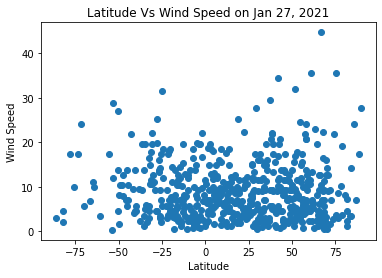

In [28]:
x_values = clean_city_data['lattitude']
y_values = clean_city_data['wind_speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude Vs Wind Speed on Jan 27, 2021')
plt.show()

## Linear Regression

In [12]:
#DataFrame of cities in Northern Hemisphere
NH_city_data=clean_city_data.loc[clean_city_data.lattitude >= 0]
#DataFrame of cities in Southern Hemisphere
SH_city_data=clean_city_data.loc[clean_city_data.lattitude < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6752010807010825


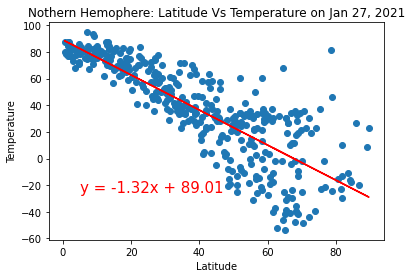

In [30]:
# Create Plot
x_values = NH_city_data['lattitude']
y_values = NH_city_data['temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,-25),fontsize=15,color="red")
plt.title('Nothern Hemophere: Latitude Vs Temperature on Jan 27, 2021')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.20695133505880517


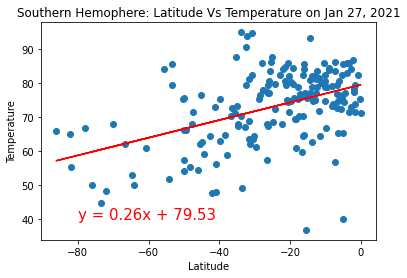

In [31]:
# Create Plot
x_values = SH_city_data['lattitude']
y_values = SH_city_data['temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-80,40),fontsize=15,color="red")
plt.title('Southern Hemophere: Latitude Vs Temperature on Jan 27, 2021')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08340155347483322


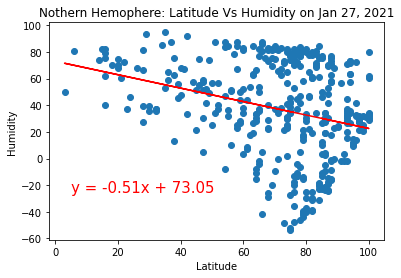

In [32]:
# Create Plot
x_values = NH_city_data['humidity']
y_values = NH_city_data['temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,-25),fontsize=15,color="red")
plt.title('Nothern Hemophere: Latitude Vs Humidity on Jan 27, 2021')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.022342002682684013


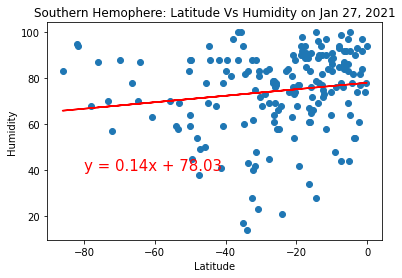

In [33]:
# Create Plot
x_values = SH_city_data['lattitude']
y_values = SH_city_data['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-80,40),fontsize=15,color="red")
plt.title('Southern Hemophere: Latitude Vs Humidity on Jan 27, 2021')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05583806455484593


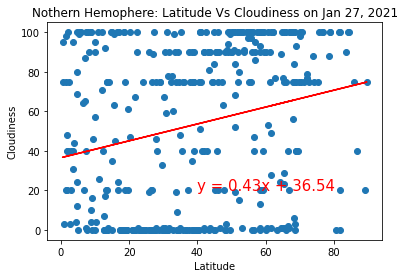

In [34]:
# Create Plot
x_values = NH_city_data['lattitude']
y_values = NH_city_data['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.title('Nothern Hemophere: Latitude Vs Cloudiness on Jan 27, 2021')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.026688483265187166


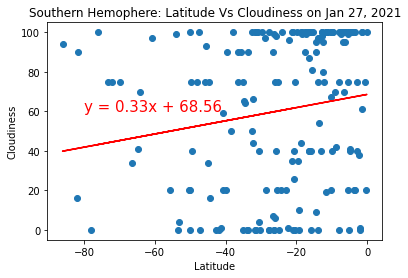

In [35]:
# Create Plot
x_values = SH_city_data['lattitude']
y_values = SH_city_data['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-80,60),fontsize=15,color="red")
plt.title('Southern Hemophere: Latitude Vs Cloudiness on Jan 27, 2021')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.001945409814704382


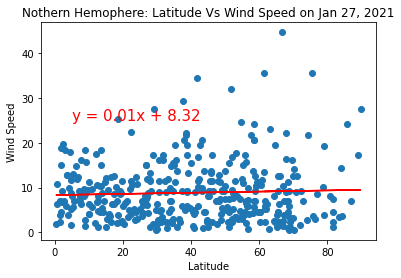

In [36]:
# Create Plot
x_values = NH_city_data['lattitude']
y_values = NH_city_data['wind_speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,25),fontsize=15,color="red")
plt.title('Nothern Hemophere: Latitude Vs Wind Speed on Jan 27, 2021')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0218937764083329


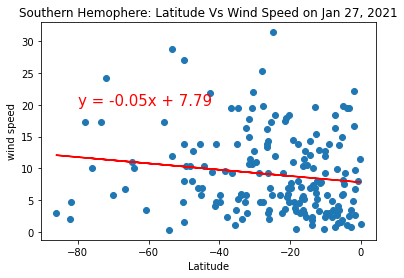

In [37]:
# Create Plot
x_values = SH_city_data['lattitude']
y_values = SH_city_data['wind_speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-80,20),fontsize=15,color="red")
plt.title('Southern Hemophere: Latitude Vs Wind Speed on Jan 27, 2021')
plt.xlabel('Latitude')
plt.ylabel('wind speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()